In [76]:
from easyocr import Reader
import matplotlib.pyplot as plt
import cv2

In [82]:
langs = ['en']
image = cv2.imread('/opt/ml/final/data/piedata(1008)/pie/images/test2019/fa09f947f3f05266b4e6fb68aa6030e1_dml0ZWp0ZW5hemVtaS5jegkxOTMuMTc5LjE4Ni4z.xls-1-0.png')
reader = Reader(langs)
results = reader.readtext(image)

In [83]:
results

[([[383, 15], [453, 15], [453, 29], [383, 29]],
  'Zemedelstvi',
  0.6854997222740552),
 ([[461, 17], [511, 17], [511, 29], [461, 29]],
  'lesnictvi',
  0.9707842035215831),
 ([[259, 141], [329, 141], [329, 155], [259, 155]],
  'Domacnosti',
  0.9867862970676711),
 ([[281, 159], [309, 159], [309, 173], [281, 173]],
  '26%6',
  0.47483134269714355),
 ([[578, 223], [625, 223], [625, 242], [578, 242]],
  'Primysl',
  0.9022167228637302),
 ([[589, 243], [617, 243], [617, 257], [589, 257]],
  '3626',
  0.3126196152879973),
 ([[219, 343], [305, 343], [305, 357], [219, 357]],
  'Ostatni odvetvi',
  0.9447174324280723),
 ([[249, 361], [275, 361], [275, 373], [249, 373]],
  '12%6',
  0.4990238239337026),
 ([[383, 475], [433, 475], [433, 489], [383, 489]],
  'Doprava',
  0.9994967188530312),
 ([[571, 479], [641, 479], [641, 493], [571, 493]],
  'Stavebnictvi',
  0.8038132402070861),
 ([[395, 491], [421, 491], [421, 505], [395, 505]],
  '23%6',
  0.6392426517520986)]

In [111]:
import math

def get_distance(x1, y1, x2, y2):
    return ((((x2 - x1 )**2) + ((y2-y1)**2) )**0.5)

def get_arc_center(points):
    x_center, y_center, x_left, y_left, x_right, y_right = points
    assert abs(get_distance(x_left,y_left, x_center, y_center) - get_distance(x_right, y_right, x_center, y_center)) < 5

    radius = get_distance(x_left,y_left, x_center, y_center)
    norm_x_left, norm_x_right = (x_left - x_center)/radius, (x_right - x_center)/radius

    # y가 역방향임
    norm_y_left, norm_y_right = (y_center - y_left)/radius, (y_center - y_right)/radius

    angle = math.atan2((norm_y_left + norm_y_right)/2, (norm_x_left + norm_x_right)/2)
    coord = (math.cos(angle)*radius + x_center, -math.sin(angle)*radius + y_center)

    # print((norm_y1 + norm_y2)/2, (norm_x1 + norm_x2)/2)
    # print(angle)
    return list(map(int, coord))

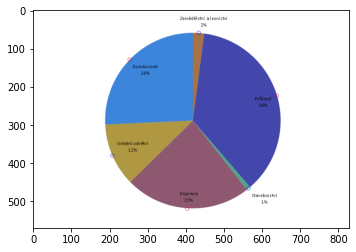

In [113]:
keypoint = [
                    [417,
                289,
                418,
                59,
                448,
                61,
                ],
                    [
                        417,
                289,
                448,
                61,
                568,
                463,
                ],
                    [
                417,
                289,
                568,
                463,
                560,
                470,
                ],
                    [
                417,
                289,
                560,
                470,
                254,
                450
                ],
                [
                    417,
                289,

                254,
                450,
                188,
                299,
                
            ],
            [
                417,
                289,
                188,
                299,
                418,
                59,
            ],
]
for pt in keypoint:
    COA = get_arc_center(pt)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.circle(image, COA, radius=5, color=(255, 0, 0), thickness=1)

plt.imshow(image)

In [110]:
import heapq
import numpy as np
import pandas as pd


def integrate(boxes):
    """
    박스 가까운 애들끼리 합치기
    """
    return boxes

def get_center(boxes):
    boxes = np.array(boxes)
    return boxes.mean(axis=0).tolist()

def match(ocr, keypoint, portion, threshold):
    labels = []
    for text in ocr:
        if '%' in text[1]:
            continue
        if text[2] < threshold:
            continue

        labels.append([get_center(text[0]), text[1]])

    ## Check
    # assert len(keypoint) == len(portion)

    pq = []
    for label in labels:
        for point_num, points in enumerate(keypoint):
            COA = get_arc_center(points)
            dist = get_distance(label[0][0], label[0][1], COA[0], COA[1])
            heapq.heappush(pq, [dist, label[1], point_num])

    legend = [None for i in range(len(portion))]

    print(pq)
    while pq:
        cur = heapq.heappop(pq)
        if legend[cur[2]] is not None:
            continue
        legend[cur[2]] = cur[1]
    
    return pd.DataFrame(portion, legend)


    # print(labels)
        

match(results, keypoint, portion=['2%', '36%', '1%', '23%', '12%', '26%'], threshold=0.5)
    

[[36.74914965002592, 'Primysl', 1], [37.33630940518894, 'Doprava', 3], [62.64982043070834, 'Ostatni odvetvi', 4], [39.92492955535426, 'Zemedelstvi', 0], [46.09772228646444, 'Domacnosti', 5], [165.05150711217394, 'Domacnosti', 0], [64.07027391856539, 'lesnictvi', 0], [155.82361823549087, 'Doprava', 2], [47.4236228055175, 'Stavebnictvi', 2], [205.6647757881743, 'Stavebnictvi', 3], [348.546266656236, 'Primysl', 3], [337.5233325268047, 'Ostatni odvetvi', 0], [256.8890811225732, 'lesnictvi', 5], [197.4968354176846, 'Zemedelstvi', 5], [221.22612865572637, 'Ostatni odvetvi', 5], [297.2574641619618, 'Zemedelstvi', 1], [225.39964507514205, 'Doprava', 4], [385.9339321697433, 'Doprava', 5], [247.7761086142084, 'Domacnosti', 4], [236.65269911834937, 'Primysl', 2], [415.5538472929832, 'Zemedelstvi', 4], [453.0893951528771, 'lesnictvi', 4], [421.17276740074254, 'Primysl', 4], [467.07708143303284, 'Zemedelstvi', 2], [364.503086406686, 'Primysl', 5], [395.9217094325594, 'Ostatni odvetvi', 1], [322.578

,0
Zemedelstvi,2%
Primysl,36%
Stavebnictvi,1%
Doprava,23%
Ostatni odvetvi,12%
Domacnosti,26%


OCR 수행해서 범례 리스트를 먼저 뽑는다
- 제목은 어떻게 잘라야 할 지 모르겠음
- %가 포함된 string은 drop
- 이외의 string 들은 라벨로 치되, 가까운 애들끼리 묶어서 라벨 처리

- 이후 두가지로 나누기
    1. 범례가 옆에 상자형으로 있는 경우
        - 정렬된 포인트 찾기 (아직 미정)
        - 여기서부터 
    2. 파이 그래프 위에 존재하는 경우
        - arc 중점과 가장 가까운 라벨 포인트끼리 연결
        - 우선순위 큐 사용